In [1]:
#michael is sus

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat

In [2]:
company_tweet = pd.read_csv('Data/Tweets/Company_Tweet.csv')
tweet = pd.read_csv('Data/Tweets/Tweet.csv')
company = pd.read_csv('Data/Tweets/Company.csv')
company_value = pd.read_csv('Data/CompanyStocks/CompanyValues.csv')

In [3]:
tweet = tweet.dropna()
#merge company tweets and tweets on id
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")

In [4]:
#create variable 'total_engagement'
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]
#remove tweets below certain engagement
engagement_threshold = 40
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]
tweet_df.head()
print('tweet count: ', tweet_df.size)

tweet count:  485118


In [5]:
#convert original time on tweet_df to date time
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [6]:
#order chronilogically
tweet_df = tweet_df.sort_values(by="day_date")

In [7]:
#convert time value on company stock data to date time
stock_df = company_value
stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])
stock_df.sample(5)


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
13706,MSFT,2011-02-28,26.58,51349260,26.69,26.860,26.51
3173,AMZN,2020-01-23,1884.58,2484613,1885.11,1889.975,1872.76
13860,MSFT,2010-07-20,25.48,45486460,24.86,25.480,24.70
7509,GOOGL,2015-02-03,533.30,2352437,529.94,537.450,526.81
15586,TSLA,2015-12-10,227.07,2070088,224.71,228.490,223.64


In [8]:
#drop un-needed features
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

In [9]:
#remove any stock data that is outside of the tweet data
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")

Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [10]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]

In [11]:
#sort stock data chronilogically
stock_df = stock_df.sort_values(by="day_date")
stock_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
2517,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
10810,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
8687,GOOGL,2015-01-01,530.66,1235889,537.74,538.40,530.20
16960,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
5602,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [12]:
tweet_df.head()

,ticker_symbol,writer,body,total_engangement,day_date
40,AAPL,CNBC,This is Wall Street's top pick in 2015. Hint: ...,64,2015-01-01
47,AAPL,WSJ,"See how tech companies like Apple, Twitter and...",347,2015-01-01
239,AAPL,greatspoke,Top Stock Analyst Releases Report on Top Stock...,433,2015-01-01
240,AAPL,greatspoke,Analyst Report on Top Stock Market Options for...,433,2015-01-01
241,AMZN,greatspoke,Analyst Report on Top Stock Market Options for...,433,2015-01-01


In [13]:
APPL_df = stock_df.loc[stock_df['ticker_symbol'] == 'AAPL']

GOOG_df = stock_df.loc[stock_df['ticker_symbol'] == 'GOOG']
GOOGL_df = stock_df.loc[stock_df['ticker_symbol'] == 'GOOGL']


TSLA_df = stock_df.loc[stock_df['ticker_symbol'] == 'TSLA']
AMZN_df = stock_df.loc[stock_df['ticker_symbol'] == 'AMZN']
MSFT_df = stock_df.loc[stock_df['ticker_symbol'] == 'MSFT']

In [14]:
#there are two types of google stocks, one has voting power in the company while the other doesnt
GOOGL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
8687,GOOGL,2015-01-01,530.66,1235889,537.74,538.4000,530.20
7530,GOOGL,2015-01-02,529.55,1325271,532.60,535.8000,527.88
8688,GOOGL,2015-01-03,529.55,1325271,532.60,535.8000,527.88
8689,GOOGL,2015-01-04,529.55,1325271,532.60,535.8000,527.88
7529,GOOGL,2015-01-05,519.46,2054120,527.15,527.9899,517.75


In [15]:
APPL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AAPL']

In [16]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [17]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string


In [18]:
def remove_special_character(tweet):
#     print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [19]:
tweet_df["body"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))
tweet_df["body"] = tweet_df["body"].str.lower()
tweet_df.sample(5)

# ?? why is the body text so fucked up ??

,ticker_symbol,writer,body,total_engangement,day_date
1225891,AAPL,davidsettle42,// - view today's marketoutlook from @market_s...,140,2018-01-25
1846149,AAPL,StockBoardAsset,$aapl arriving at .%-fib .,83,2019-12-26
3071588,AMZN,Stocktwits,stocktwits trending tickers bmo // $amzn holi...,43,2019-12-27
4250901,TSLA,JonathanApgar,the tesla cybertruck cybrtrk design is literal...,127,2019-11-26
3675604,TSLA,QTRResearch,super appreciative to just have had @gerberkaw...,105,2018-04-04


In [20]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [22]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

In [23]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))


In [24]:
#create a weighted scored based off engagement and sentiment analysis score
tweet_df['summarative_score'] = tweet_df['total_engangement'] * tweet_df['vander_score'] * 0.01
tweet_df = tweet_df.drop(['total_engangement', 'vander_score'], axis=1)


In [25]:
#sum or avg the summarative_scores for one date
APPL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AAPL']

GOOG_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'GOOG']
GOOGL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'GOOGL']


TSLA_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'TSLA']
AMZN_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AMZN']
MSFT_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'MSFT']

In [26]:
GOOG_tweet.head()

,ticker_symbol,writer,body,day_date,summarative_score
1850635,GOOG,WSJ,google now controls or occupies a strip of man...,2015-01-04,0.000000
4040,GOOG,DanielEran,"despite lawsuit, $aapl ios is far more storag...",2015-01-05,0.410522
1854377,GOOG,WSJ,google is exploring how to use frequencies to ...,2015-01-20,0.000000
1854055,GOOG,WSJ,google is close to investing $ billion in spac...,2015-01-20,1.547000
1854431,GOOG,The_Real_Fly,"obama is long $ebay, $goog and $tsla",2015-01-21,0.000000


In [27]:
APPL_tweet = APPL_tweet.groupby('day_date')['summarative_score'].sum()
GOOG_tweet = GOOG_tweet.groupby('day_date')['summarative_score'].sum()
GOOGL_tweet = GOOGL_tweet.groupby('day_date')['summarative_score'].sum()
TSLA_tweet = TSLA_tweet.groupby('day_date')['summarative_score'].sum()
AMZN_tweet = AMZN_tweet.groupby('day_date')['summarative_score'].sum()
MSFT_tweet = MSFT_tweet.groupby('day_date')['summarative_score'].sum()


In [28]:
APPL_df = APPL_df.merge(APPL_tweet, how = 'outer', on = 'day_date')
GOOG_df = APPL_df.merge(GOOG_tweet, how = 'outer', on = 'day_date')
GOOGL_df = APPL_df.merge(GOOGL_tweet, how = 'outer', on = 'day_date')
TSLA_df = APPL_df.merge(TSLA_tweet, how = 'outer', on = 'day_date')
AMZN_df = APPL_df.merge(AMZN_tweet, how = 'outer', on = 'day_date')
MSFT_df = APPL_df.merge(MSFT_tweet, how = 'outer', on = 'day_date')

APPL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,summarative_score
0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,3.911989
1,AAPL,2015-01-02,109.33,53143770,111.39,111.44,107.35,2.044350
2,AAPL,2015-01-03,109.33,53143770,111.39,111.44,107.35,NaN
3,AAPL,2015-01-04,109.33,53143770,111.39,111.44,107.35,1.740136
4,AAPL,2015-01-05,106.25,64210880,108.29,108.65,105.41,0.866415


In [29]:
APPL_df = APPL_df.replace(to_replace = np.nan, value = 0)
GOOG_df = GOOG_df.replace(to_replace = np.nan, value = 0)
GOOGL_df = GOOGL_df.replace(to_replace = np.nan, value = 0)
AMZN_df = AMZN_df.replace(to_replace = np.nan, value = 0)
TSLA_df = TSLA_df.replace(to_replace = np.nan, value = 0)
MSFT_df = MSFT_df.replace(to_replace = np.nan, value = 0)


# # LSTM MODEL: 

In [30]:
#pip install tensorflow==2.9.1

In [31]:
#here we will do the LSTM model

#/-\|/-\|
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

plt.style.use('fivethirtyeight')


In [32]:
APPL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,summarative_score
0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,3.911989
1,AAPL,2015-01-02,109.33,53143770,111.39,111.44,107.35,2.044350
2,AAPL,2015-01-03,109.33,53143770,111.39,111.44,107.35,0.000000
3,AAPL,2015-01-04,109.33,53143770,111.39,111.44,107.35,1.740136
4,AAPL,2015-01-05,106.25,64210880,108.29,108.65,105.41,0.866415


In [33]:
#train_size = int(APPL_df.shape[0] * 0.80)
#print(APPL_df.shape[0])
#test_size = APPL_df.shape[0] - train_size

#training_set = APPL_df.iloc[:train_size, 2:].values
#test_set = APPL_df.iloc[train_size:, 2:].values
#train_size * 6 size 



# Indexing Batches

train_df = APPL_df.sort_values(by=['day_date']).copy()
train_df.drop('ticker_symbol', inplace=True, axis=1)

train_df.drop('day_date', inplace=True, axis=1)


# Create the dataset with features and filter the data to the list of FEATURES


# We add a prediction column and set dummy values to prepare the data for scaling
train_df_ext = train_df.copy()
train_df_ext['Prediction'] = train_df_ext['close_value']

# Print the tail of the dataframe
train_df_ext.tail()

,close_value,volume,open_value,high_value,low_value,summarative_score,Prediction
1821,289.80,36592940,291.12,293.97,288.12,0.115701,289.80
1822,289.80,36592940,291.12,293.97,288.12,0.411740,289.80
1823,289.80,36592940,291.12,293.97,288.12,2.102808,289.80
1824,291.52,36059610,289.46,292.69,285.22,7.807207,291.52
1825,293.65,25247630,289.93,293.68,289.52,1.383618,293.65


In [35]:
# Get the number of rows in the data
nrows = train_df.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(train_df)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(train_df_ext['close_value'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)



# Feature Scaling
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set)

#scaler_pred = MinMaxScaler()
#df_Close = pd.DataFrame(train_df_ext['close_value'])
#np_Close_scaled = scaler_pred.fit_transform(df_Close)




(1826, 6)


In [36]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = APPL_df.columns.get_loc("close_value")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(1411, 50, 6) (1411,)
(365, 50, 6) (365,)
0.19202466189339695
0.19202466189339695


In [38]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Training the model
epochs = 25
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

300 50 6
Epoch 1/25
89/89 [==============================] - 37s 352ms/step - loss: 0.0042 - val_loss: 6.0958e-04
Epoch 2/25
89/89 [==============================] - 33s 376ms/step - loss: 2.7479e-04 - val_loss: 0.0020
Epoch 3/25
89/89 [==============================] - 28s 318ms/step - loss: 2.6726e-04 - val_loss: 4.9060e-04
Epoch 4/25
89/89 [==============================] - 26s 287ms/step - loss: 2.6404e-04 - val_loss: 0.0017
Epoch 5/25
89/89 [==============================] - 27s 298ms/step - loss: 2.1202e-04 - val_loss: 4.4893e-04
Epoch 6/25
89/89 [==============================] - 29s 328ms/step - loss: 1.8572e-04 - val_loss: 3.2845e-04
Epoch 7/25
89/89 [==============================] - 31s 345ms/step - loss: 1.8669e-04 - val_loss: 3.6034e-04
Epoch 8/25
89/89 [==============================] - 25s 277ms/step - loss: 1.9810e-04 - val_loss: 3.0968e-04
Epoch 9/25
89/89 [==============================] - 37s 420ms/step - loss: 1.4867e-04 - val_loss: 7.8648e-04
Epoch 10/25
89/89 [===

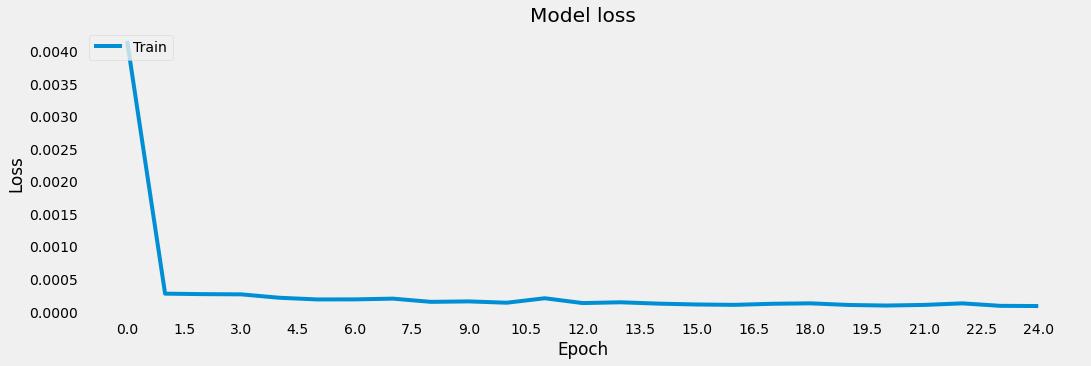

In [39]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [42]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')




12/12 [==============================] - 4s 137ms/step
Median Absolute Error (MAE): 3.23
Mean Absolute Percentage Error (MAPE): 1.55 %
Median Absolute Percentage Error (MDAPE): 1.43 %


In [83]:
# The date from which on the date is displayed
display_start_date = "2019-01-01" 


test = train_df_ext['close_value'][:train_data_len + 1]
#print(test)
# Add the difference between the valid and predicted prices
train = pd.DataFrame(train_df_ext['close_value'][:train_data_len + 1]).rename(columns={'close_value': 'y_train'})
valid = pd.DataFrame(train_df_ext['close_value'][train_data_len:]).rename(columns={'close_value': 'y_test'})

print(y_pred.size)
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
train.info()
valid.info()
df_union = pd.concat([train, valid])



df_union.info()

df_union.head()
df_union.index

365
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1461
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y_train  1462 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1461 to 1825
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y_test     365 non-null    float64
 1   residuals  365 non-null    float64
 2   y_pred     365 non-null    float32
dtypes: float32(1), float64(2)
memory usage: 10.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y_train    1462 non-null   float64
 1   y_test     365 non-null    float64
 2   residuals  365 non-null    float64
 3   y_pred     365 non-null    float32
dtypes: float32(1), float64(

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825],
           dtype='int64', length=1827)

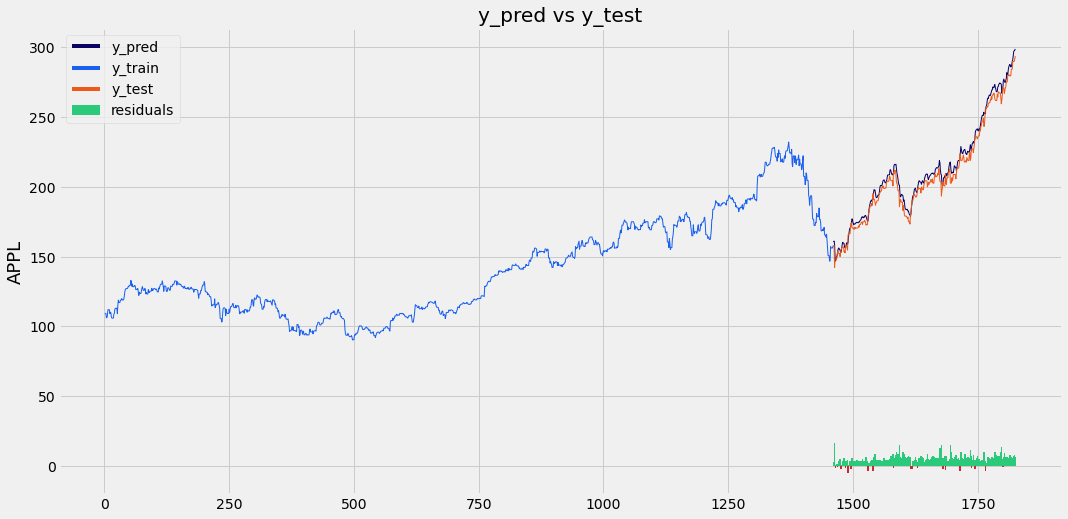

In [90]:
#Zoom in to a closer timeframe
stockname = 'APPL'
df_union_zoom = df_union[df_union.index > 0]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel(stockname, fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()

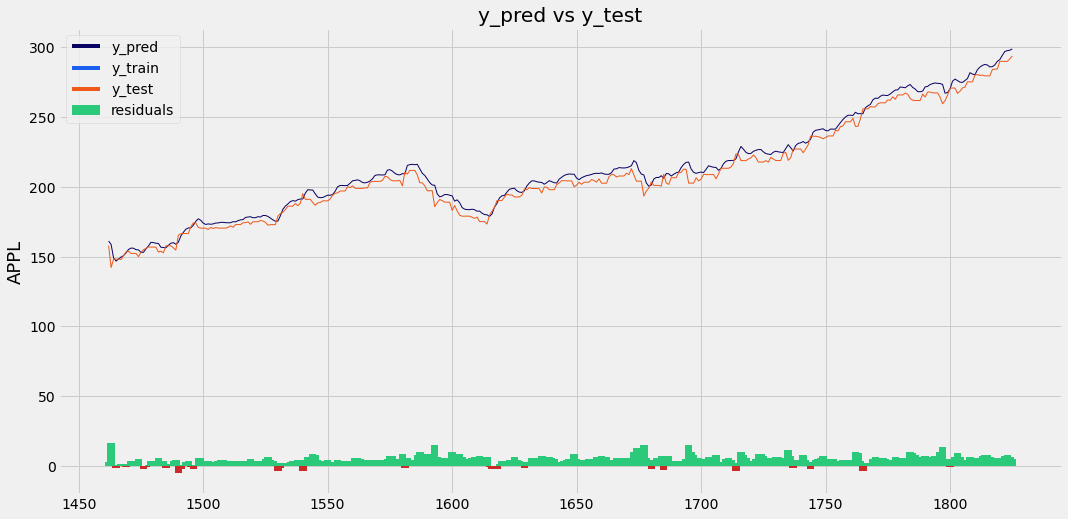

In [89]:
#Zoom in to a closer timeframe

df_union_zoom = df_union[df_union.index > train_data_len]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel(stockname, fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["residuals"].dropna()]
ax1.bar(height=df_union_zoom['residuals'].dropna(), x=df_union_zoom['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()

In [65]:
new_df = APPL_df[-sequence_length:]
new_df.drop('ticker_symbol', inplace=True, axis=1)
new_df.drop('day_date', inplace=True, axis=1)


N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
size = new_df['close_value'].size
print(size)

new_df.head(5)

1/1 [==============================] - 0s 42ms/step
50


/var/folders/c8/kyj_xhqd1hz487fy48brhp1m0000gp/T/ipykernel_14919/1433267676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('ticker_symbol', inplace=True, axis=1)
/var/folders/c8/kyj_xhqd1hz487fy48brhp1m0000gp/T/ipykernel_14919/1433267676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('day_date', inplace=True, axis=1)


,close_value,volume,open_value,high_value,low_value,summarative_score
1776,261.96,21847230,261.55,262.79,260.92,0.824399
1777,264.47,25817590,261.13,264.78,261.07,0.512075
1778,262.64,22395560,263.75,264.88,262.10,-0.574103
1779,265.76,25093670,263.68,265.78,263.01,3.013398
1780,265.76,25093670,263.68,265.78,263.01,0.240958
